In [31]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [23]:
from pandas_datareader import data as pdr
data = pdr.get_data_yahoo("MTUM", start="2017-01-01", end="2020-01-01")
#data.columns

[*********************100%***********************]  1 of 1 completed


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

Visualization of closing price (on row data & log-scale)

C:\Users\dizarnotegui\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  del sys.path[0]


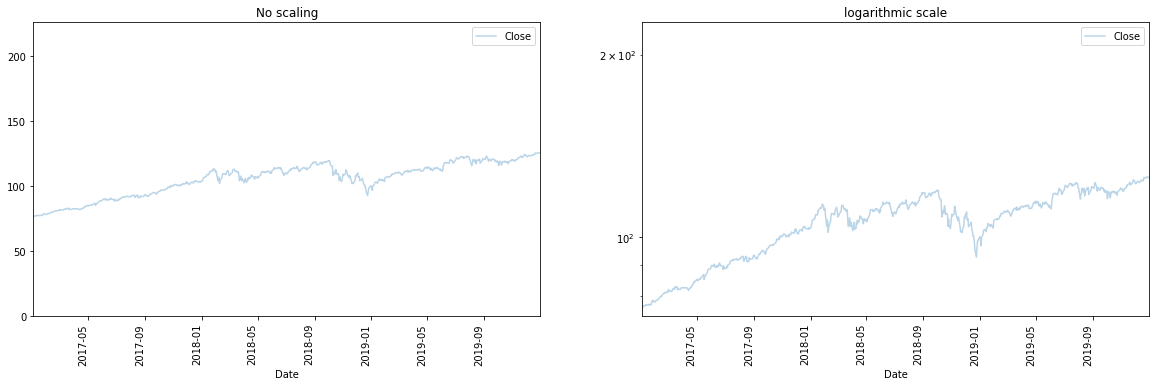

In [30]:
plt.figure(num=None, figsize=(20, 6))
plt.subplot(1,2,1)
ax = data['Close'].plot(style=['-'])
ax.lines[0].set_alpha(0.3)
ax.set_ylim(0, np.max(data['Close'] + 100))
plt.xticks(rotation=90)
plt.title("No scaling")
ax.legend()
plt.subplot(1,2,2)
ax = data['Close'].plot(style=['-'])
ax.lines[0].set_alpha(0.3)
ax.set_yscale('log')
ax.set_ylim(0, np.max(data['Close'] + 100))
plt.xticks(rotation=90)
plt.title("logarithmic scale")
ax.legend()

Logarithmic price scale—also referred to as log—represents price spacing on the vertical or y-axis dependent on the percentage of change in the underlying asset's price. This is usually the default chart style
A logarithmic price scale is plotted so that the prices in the scale are not positioned equidistantly—equally from one another. Instead, the measure is plotted in such a way that two equal percent changes are plotted as the same vertical distance on the scale.
Most technical analysts and traders use logarithmic price scales.
Logarithmic price scales are better than linear price scales at showing less severe price increases or decreases. They can help you visualize how far the price must move to reach a buy or sell target. However, if prices are close together, logarithmic price scales may render congested and hard to read.

Lag Plot - Checking whether time series is random or not

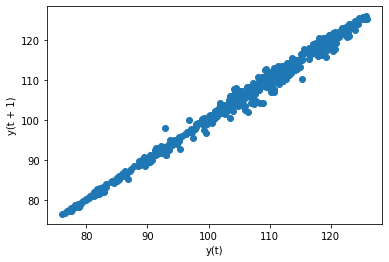

In [35]:
from pandas.plotting import lag_plot
lag_plot(data['Close'])

As we see the graph above, this suggests the non-random pattern (graph is poistively linear).
Non-randomness in the data reveals that we could use, for example, an autoregressive model.

Autocorrelation

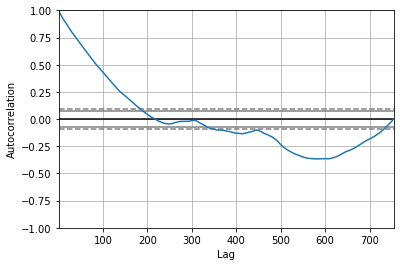

In [36]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data['Close'])

A lag plot above shows the structure in the data. In order to quantify the correlation between the point at t and point at t+1 withe respect to expectation, autocrrelation is used.

A black line in the graph below shows the expectation for random data(thus 0 correlation) and two dash lines above and below it represent the confidence interval with each 95% and 99%.

The graph shows a strong correlation for lags of < 100 days and lags > 500 days. (lag 0 is always 1 corrleation)

Autocorrelation plots are often used for checking randomness in time series. This is done by computing autocorrelations for data values at varying time lags. If time series is random, such autocorrelations should be near zero for any and all time-lag separations. If time series is non-random then one or more of the autocorrelations will be significantly non-zero